# Week 6 - Rasters

## Challenge 1

CheckedOut


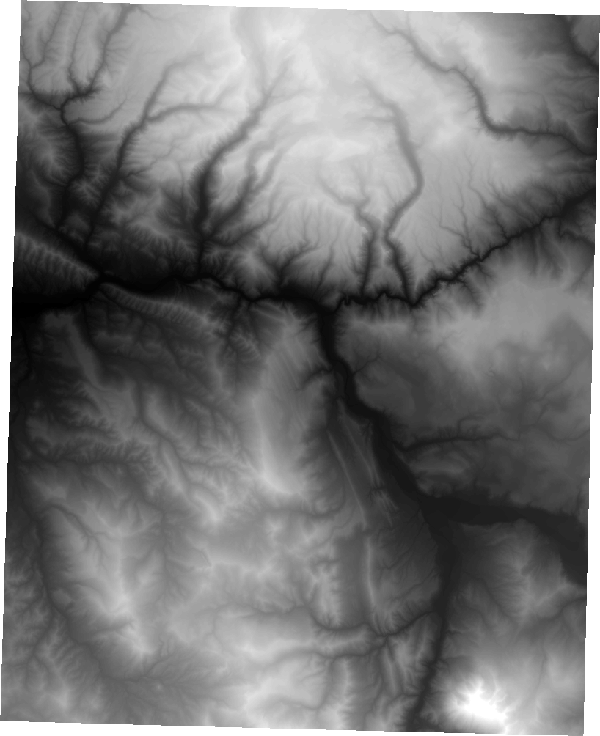

In [1]:
# Challenge 1
import arcpy
from arcpy import env
from arcpy.sa import *
env.workspace = "C:/EsriPress/Python/Data/Exercise09"

if arcpy.CheckExtension("Spatial") == "Available":
    print(arcpy.CheckOutExtension("Spatial"))

elev = arcpy.Raster("elevation")
lc = arcpy.Raster("landcover.tif")

elev

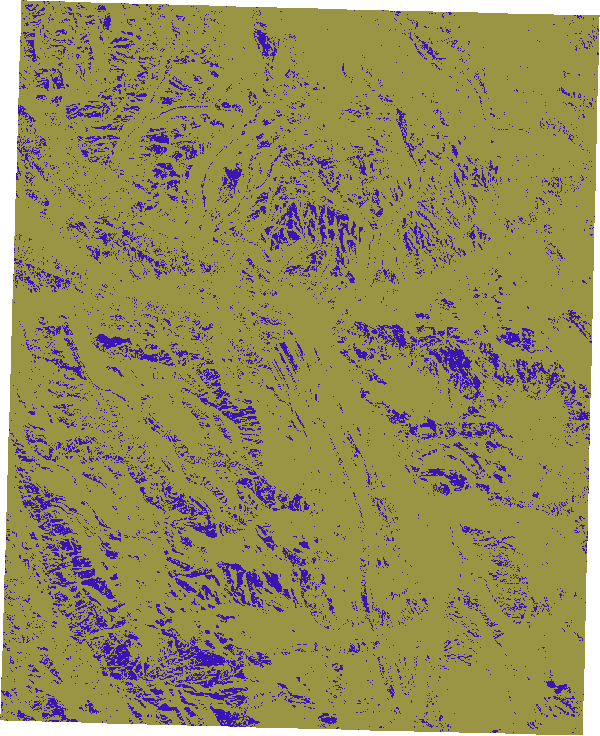

In [2]:
slope = Slope(elev)
aspect = Aspect(elev)
goodslope = ((slope > 5) & (slope < 20))
goodaspect = ((aspect > 150) & (aspect < 270))
goodland = ((lc == 41) | (lc == 42) | (lc ==43))
outraster = (goodslope & goodaspect & goodland)

outraster

In [3]:
outraster.save("C:/EsriPress/Python/Data/Exercise09/Results/final")
print(arcpy.CheckInExtension("Spatial"))

CheckedIn


## Problem 2

Aspect_elevatio1.tif


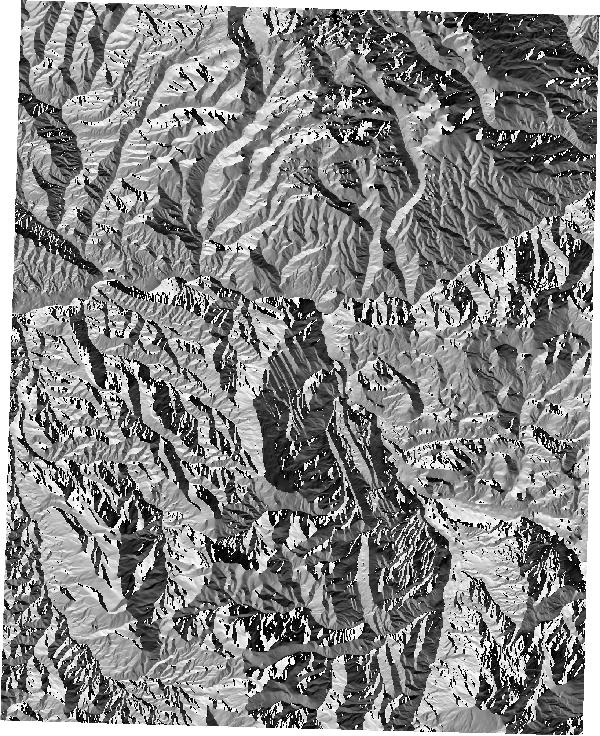

Elevation


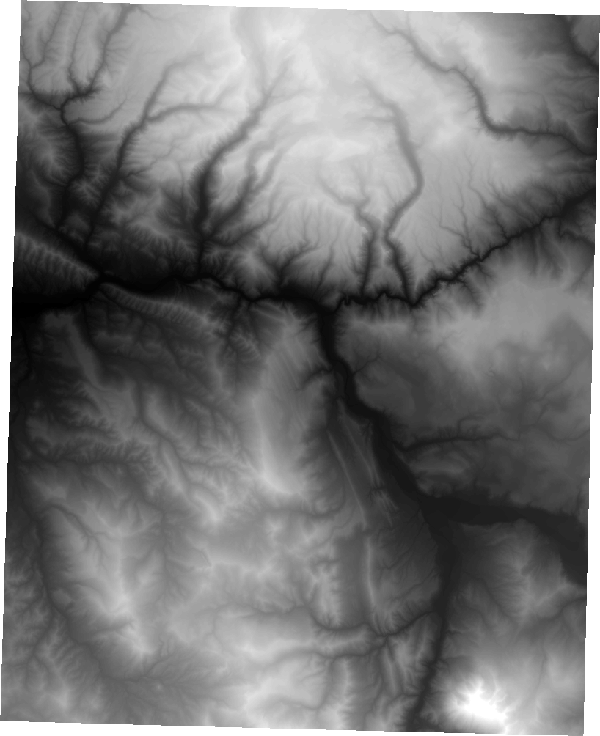

landcover.tif


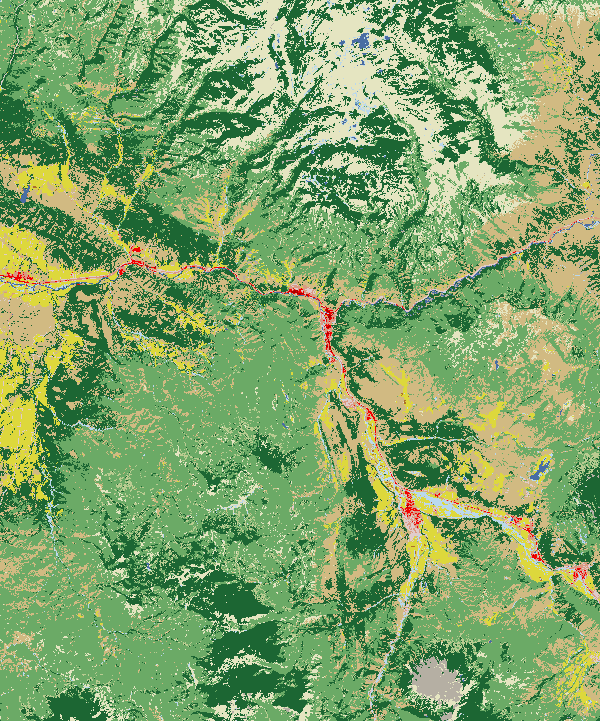

Slope_elevation1.tif


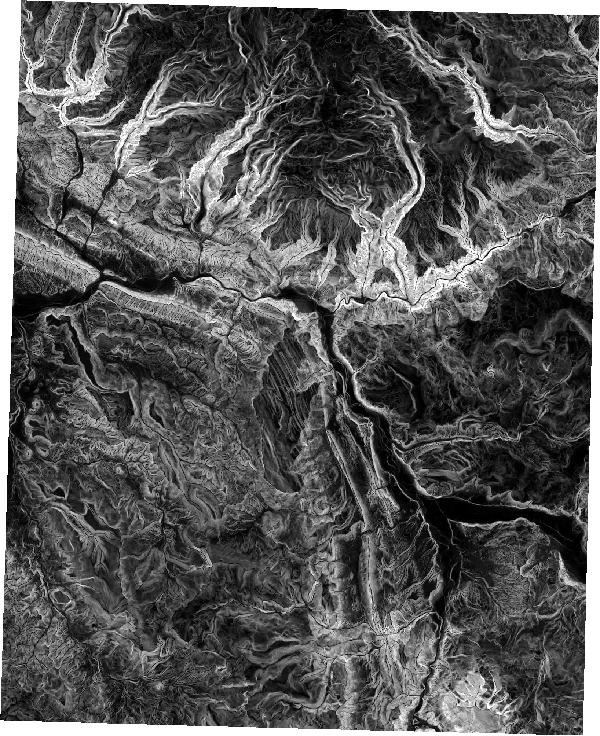

tm.img


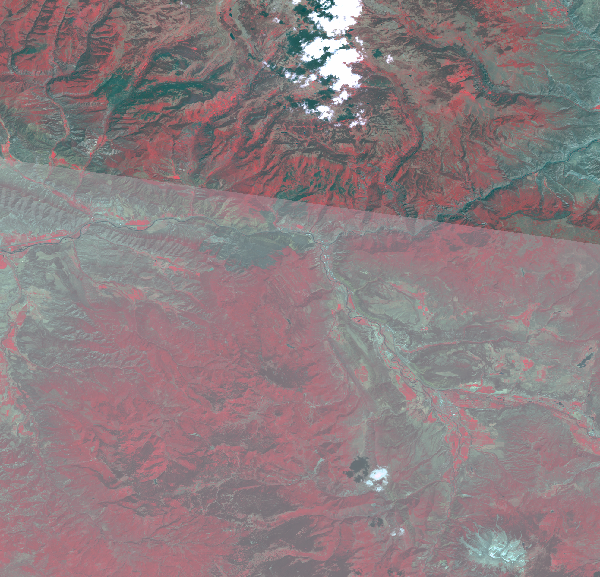

In [7]:
import arcpy
from arcpy import env
from arcpy.sa import *

from IPython.display import display

out_path = "C:/EsriPress/Python/Data/Exercise09"
env.workspace = out_path
env.overwriteOutput = True

rasterlist = arcpy.ListRasters()
arcpy.CreateFileGDB_management(out_path + "/Results", "myrasters. gdb")

for raster in rasterlist:
    print(raster)
    display(Raster(raster))
    desc = arcpy.Describe(raster)
    rname = desc.baseName
    outraster = out_path + "/Results/myrasters.gdb/" + rname
    arcpy.CopyRaster_management(raster, outraster)
